# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

** Общие статистики

In [22]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,21348.000000,2.134800e+04
mean,0.473674,67233.049266,43.285835,0.817079,0.974283,0.081132,1.653184e+05
std,0.752199,139351.730617,12.578779,0.549115,1.421299,0.273044,9.827990e+04
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1025.203063,33.000000,1.000000,0.000000,0.000000,1.075595e+05
50%,0.000000,1996.658290,42.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,5347.525014,53.000000,1.000000,1.000000,0.000000,1.957885e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [23]:
display('Корреляция Пирсона', data.corr(method='pearson'))

'Корреляция Пирсона'

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.239912,-0.310919,-0.027140,-0.158835,0.024769,0.032351
days_employed,-0.239912,1.000000,0.587948,0.081241,0.003561,-0.042345,-0.141647
dob_years,-0.310919,0.587948,1.000000,0.067008,-0.069795,-0.069698,-0.057774
education_id,-0.027140,0.081241,0.067008,1.000000,0.007717,0.052746,-0.172290
family_status_id,-0.158835,0.003561,-0.069795,0.007717,1.000000,0.020224,-0.007546
debt,0.024769,-0.042345,-0.069698,0.052746,0.020224,1.000000,-0.012596
total_income,0.032351,-0.141647,-0.057774,-0.172290,-0.007546,-0.012596,1.000000


In [24]:
display('Корреляция Спирмана', data.corr(method='spearman'))

'Корреляция Спирмана'

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.191812,-0.342300,-0.038076,-0.156419,0.028841,0.035621
days_employed,-0.191812,1.000000,0.536249,0.045366,-0.039662,-0.074686,-0.095978
dob_years,-0.342300,0.536249,1.000000,0.075646,-0.045158,-0.071941,-0.087964
education_id,-0.038076,0.045366,0.075646,1.000000,0.013074,0.056432,-0.182800
family_status_id,-0.156419,-0.039662,-0.045158,0.013074,1.000000,0.022936,-0.013030
debt,0.028841,-0.074686,-0.071941,0.056432,0.022936,1.000000,-0.010282
total_income,0.035621,-0.095978,-0.087964,-0.182800,-0.013030,-0.010282,1.000000


In [55]:
#первоначальное решение
debt_children = pd.DataFrame()
debt_children['children_amount'] = [0, 1, 2, 3, 4, 5]
debt_children['sum_of_clients'] = data.groupby('children')['gender'].count()
debt_children['sum_of_clients_with_debt'] = data.groupby('children')['debt'].sum()
debt_children['children_dept_prob'] = debt_children['sum_of_clients_with_debt'] / debt_children['sum_of_clients']
debt_children['general_prob'] = debt_children['sum_of_clients_with_debt'] / data['children'].count()
display(debt_children)

,children_amount,sum_of_clients,sum_of_clients_with_debt,children_dept_prob,general_prob
0,0,14107,1063,0.075353,0.049794
1,1,4809,444,0.092327,0.020798
2,2,2052,194,0.094542,0.009088
3,3,330,27,0.081818,0.001265
4,4,41,4,0.097561,0.000187
5,5,9,0,0.000000,0.000000


In [61]:
# Вариант решения №2
pivot_children = data.pivot_table(index='children', values='debt', aggfunc=['count', 'sum','mean']).rename(columns={'count' : 'sum_of clients', 'sum' : 'sum_of_clients_with_debt', 'mean' : 'debt_rate'})
display(pivot_children)

,sum_of clients,sum_of_clients_with_debt,dabt_rate
,debt,debt,debt
children,,,
0,14107,1063,0.075353
1,4809,444,0.092327
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


In [68]:
#Вариант решения №3
#в данном решениее не переименовываются столбцы сводной, как в варианте 2. Но добавление 
#.rename(columns={'count' : 'sum_of clients', 'sum' : 'sum_of_clients_with_debt', 'mean' : 'debt_rate'})
# возвращает новые названия
def rate(feature):
    return data.pivot_table(index=feature, values='debt', aggfunc=['count', 'sum','mean'])

In [69]:
rate('children')

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
children,,,
0,14107,1063,0.075353
1,4809,444,0.092327
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


<AxesSubplot:xlabel='children_amount', ylabel='children_dept_prob'>

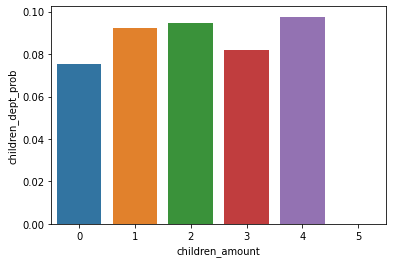

In [27]:
seaborn.barplot(x='children_amount', y='children_dept_prob', data=debt_children)

<AxesSubplot:xlabel='children_amount', ylabel='sum_of_clients_with_debt'>

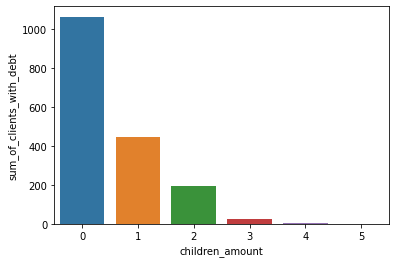

In [28]:
seaborn.barplot(x='children_amount', y='sum_of_clients_with_debt', data=debt_children)

<AxesSubplot:xlabel='children_amount', ylabel='general_prob'>

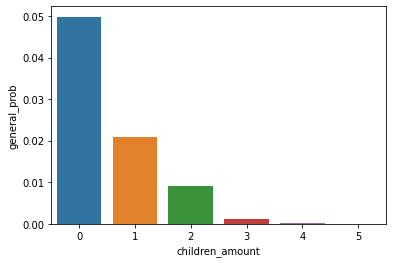

In [29]:
seaborn.barplot(x='children_amount', y='general_prob', data=debt_children)

In [30]:
display(debt_children['sum_of_clients'][0] / (debt_children['sum_of_clients'].sum() - debt_children['sum_of_clients'][0]))
display(debt_children['sum_of_clients_with_debt'][0] / (debt_children['sum_of_clients_with_debt'].sum() - debt_children['sum_of_clients_with_debt'][0]))


1.9482115729871565

1.5889387144992526

**Вывод:** 
В целом количество детей у заемщика влияет на вероятность возврата кредита в срок. Так, заемщиков которые не вернули кредит в срок:

- бездетных - 7,5%,
- с одним ребенком - 9,2%
- с двумя детьми - 9,5%
- 4-мя детьми - 9,8%

С другой стороны, "плохих" заемщиков с тремя детьми - 8,2%, а у заемщиков с 5-ю детьми еще не было просрочек. 

Cтоит отметить, что число бездетных заемщиков в 1,95 раза больше, чем остальных заемщиков с 1-м и более детьми, и просрочек выплат у бездетных заемщиков в 1,59  раза больше чем у остальных. Подобный перекос в выборке в сторону бездетных заемщиков влияет на долю "невозвратных кредитов" в общем количестве кредитов. Так, доля невозвратных кредитов в общем количестве кредиов у бездетных заемщиков самая высокая и составляет почти 5%, а у заемщиков с 4-мя детьми - 0,01%. Поэтому может сложиться впечатление, что многодетные заемщики более привлекательны для выдачи кредитов в будущем.

Необходимо учитывать также то, что корреляция (Спирмена для дискретных значений) между значением количества детей и возратом кредита в срок "очень слабая" и близка к 0.

Для более корректной оценки по данному показателю необходимо обогатить базу клиентами с детьми. 
Давайте срочно раздадим кредиты многодетным =)



**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [80]:
debt_family_status = pd.DataFrame()
debt_family_status['sum_of_clients'] = data.groupby('family_status')['gender'].count()
debt_family_status['sum_of_clients_with_debt'] = data.groupby('family_status')['debt'].sum()
debt_family_status['status_dept_prob'] = debt_family_status['sum_of_clients_with_debt'] / debt_family_status['sum_of_clients']
debt_family_status['general_prob'] = debt_family_status['sum_of_clients_with_debt'] / data['children'].count()
display(debt_family_status)

,sum_of_clients,sum_of_clients_with_debt,status_dept_prob,general_prob
family_status,,,,
Не женат / не замужем,2796,273,0.097639,0.012788
в разводе,1189,84,0.070648,0.003935
вдовец / вдова,951,63,0.066246,0.002951
гражданский брак,4146,385,0.092861,0.018034
женат / замужем,12266,927,0.075575,0.043423


<AxesSubplot:xlabel='sum_of_clients', ylabel='family_status'>

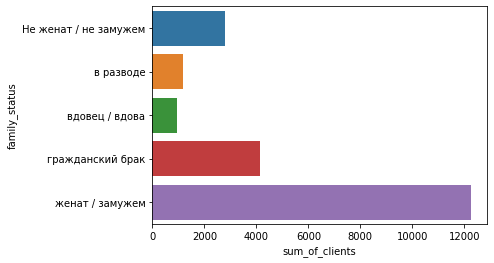

In [88]:
#debt_family_status.reset_index()
debt_family_status['family_status'] = ['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']
seaborn.barplot(x='sum_of_clients', y='family_status', data=debt_family_status)
#display(debt_family_status)

<AxesSubplot:xlabel='status_dept_prob', ylabel='family_status'>

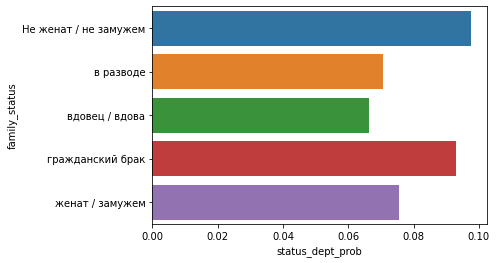

In [33]:
seaborn.barplot(x='status_dept_prob', y='family_status', data=debt_family_status)

In [72]:
# Вариант решения №2
pivot_family_status = data.pivot_table(index='family_status', values='debt', aggfunc=['count', 'sum','mean']).rename(columns={'count' : 'sum_of clients', 'sum' : 'sum_of_clients_with_debt', 'mean' : 'debt_rate'})
display(pivot_family_status)

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4146,385,0.092861
женат / замужем,12266,927,0.075575


In [73]:
# Вариант решения №3
rate('family_status')

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4146,385,0.092861
женат / замужем,12266,927,0.075575


**Вывод:** 

Существует некая зависимость между семейным положением и вероятностью возврата кредита в срок. Так самые "злостные нарушители" - незамужние/неженатые и состоящие в гражданском браке (скорее всего это связано с возрастом, т.к такой статус имеет прежде всего свободная молодежь, но в рамках задания этого выяснять не требуется, поэтому см. след вывод на экран).

Самые "пунктуальные" и ответственные заемщики - находящиеся в разводе или овдовели.  В тоже время, хотя доля заемщиков с невозвращенными кредитами среди женатых и замужних, ниже чем доля таких среди "свободных" заемщиков, в общем количестве всех кредитов доля невозвращенных кредитов от неженатых заемщиков выше, чем в остальных группах. Скорее всего такое распределение вызвано тем, что доля таких заемщиков в общей выборке составляет более 50%.

**Посмотрим на распределение между числом невозвращенных кредитов и возрастом заемщиков**

In [34]:
#data.describe()
data_pivot = data.pivot_table(index='dob_years', columns='family_status', values='debt', aggfunc='sum')
data_pivot['sum_free'] = data_pivot['Не женат / не замужем'] + data_pivot['гражданский брак']
display(data_pivot.head(20))

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем,sum_free
dob_years,,,,,,
0,1.0,0.0,1.0,2.0,4.0,3.0
19,1.0,NaN,NaN,0.0,0.0,1.0
20,1.0,0.0,NaN,1.0,2.0,2.0
21,9.0,0.0,NaN,1.0,4.0,10.0
22,13.0,1.0,NaN,6.0,5.0,19.0
23,6.0,0.0,0.0,9.0,5.0,15.0
24,11.0,1.0,NaN,4.0,8.0,15.0
25,16.0,2.0,NaN,8.0,17.0,24.0
26,14.0,1.0,NaN,9.0,23.0,23.0


Из сводной талицы видно, что молодых "свободные" заемщики (незамужние и в гр. браке) с невозращенными кредитами в срок больше, чем замужних/ женатых

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [35]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [36]:
debt_income = pd.DataFrame()

debt_income['sum_of_clients'] = data.groupby('total_income_category')['gender'].count()
debt_income['sum_of_clients_with_debt'] = data.groupby('total_income_category')['debt'].sum()
debt_income['inccat_dept_prob'] = debt_income['sum_of_clients_with_debt'] / debt_income['sum_of_clients']
debt_income['category'] = ['A', 'B', 'C', 'D', 'E']
display(debt_income)

,sum_of_clients,sum_of_clients_with_debt,inccat_dept_prob,category
total_income_category,,,,
A,25,2,0.080000,A
B,5014,354,0.070602,B
C,15938,1353,0.084891,C
D,349,21,0.060172,D
E,22,2,0.090909,E


<AxesSubplot:xlabel='category', ylabel='inccat_dept_prob'>

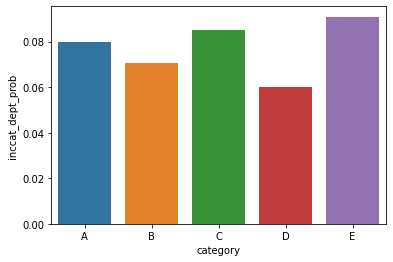

In [37]:
seaborn.barplot(x='category', y='inccat_dept_prob', data=debt_income)

In [89]:
# Вариант решения №2
pivot_income = data.pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'sum','mean']).rename(columns={'count' : 'sum_of clients', 'sum' : 'sum_of_clients_with_debt', 'mean' : 'debt_rate'})
display(pivot_income)

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15938,1353,0.084891
D,349,21,0.060172
E,22,2,0.090909


In [90]:
# Вариант решения №3
rate('total_income_category')

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15938,1353,0.084891
D,349,21,0.060172
E,22,2,0.090909


**Вывод:** 

Из таблицы корреляций видно, что корреляция между уровнем дохода и возвратом кредита в срок отсутствует.
Доли невозращающих вредиты в срок среди "сверхбогатых" (категория А) и "бедных" (категория Е) различается на 1 п.п. и сопоставима с долей из категории заемщиков среднего достатка (категория С). При этом "богатые" (категория D) ответственнее всех (что в принципе не удивительно)

Для полноценного анализа и выявления такой зависимости не хватает данных о кредитах, выданных заемщикам категорий А и Е, т.к. количество таких заемщиков в выборке слишком мало. Как видно из общего распеределения, наш ПАО "Поддрежка среднего класса с зарплатой 17 тыс. руб"* в основном выдавал кредиты заемщикам со средним доходом, при этом нельзя сказать, что такие заемщики являются ответственными, т.к. у заемщиков с меньшим доходом (бедные и сверхбедные) двероятность не возврата в срок - меньше.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [38]:
purpose_debt = pd.DataFrame()
purpose_debt['sum_of_clients'] = data.groupby('purpose_category')['gender'].count() 
purpose_debt['sum_of_clients_with_debt'] = data.groupby('purpose_category')['debt'].sum()
purpose_debt['prob'] = purpose_debt['sum_of_clients_with_debt'] / purpose_debt['sum_of_clients']
purpose_debt['general_prob'] = purpose_debt['sum_of_clients_with_debt'] / 21348

purpose_debt


,sum_of_clients,sum_of_clients_with_debt,prob,general_prob
purpose_category,,,,
операции с автомобилем,4281,400,0.093436,0.018737
операции с недвижимостью,10754,780,0.072531,0.036537
получение образования,3989,369,0.092504,0.017285
проведение свадьбы,2324,183,0.078744,0.008572


In [39]:
data_pivot_debt = data.pivot_table(index='purpose_category', columns='total_income_category', values='debt', aggfunc='sum')
data_pivot_debt

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,0,85,305,10,0
операции с недвижимостью,1,172,599,6,2
получение образования,1,69,297,2,0
проведение свадьбы,0,28,152,3,0


<AxesSubplot:xlabel='total_income_category', ylabel='purpose_category'>

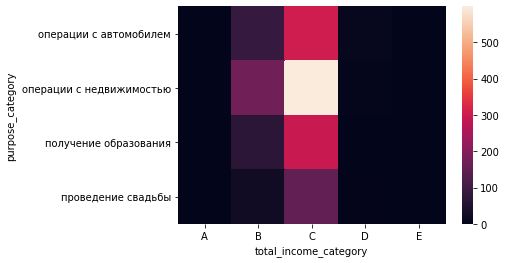

In [40]:
seaborn.heatmap(data_pivot_debt)

In [91]:
# Вариант решения №2
pivot_purpose = data.pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'sum','mean']).rename(columns={'count' : 'sum_of clients', 'sum' : 'sum_of_clients_with_debt', 'mean' : 'debt_rate'})
display(pivot_purpose)

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4281,400,0.093436
операции с недвижимостью,10754,780,0.072531
получение образования,3989,369,0.092504
проведение свадьбы,2324,183,0.078744


In [92]:
# Вариант решения №3
rate('purpose_category')

,sum_of clients,sum_of_clients_with_debt,debt_rate
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4281,400,0.093436
операции с недвижимостью,10754,780,0.072531
получение образования,3989,369,0.092504
проведение свадьбы,2324,183,0.078744


**Вывод:** 

Чаще всего просрочка происходит по кредитам из категорий "операции с автомобилем" и "получение образования".

Хотя доля невозвращенныз в срок кредитов самая минимальная (7,2%) в категории "операции с недвижимостью", в общей массе кредитов данная категория является самой "проблемной". Вероятность невозврата кредитов на проведение свадьбы сопоставима с невозвратом кредита на недвижимость, но в тоже время в общем количестве кредитов кредиты на свадьбу - самый "непроблемный" продукт, т.к. таких невозвращенных кредитов менее 1%.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

In [41]:
data_nan = data.loc[data['days_employed'].isna() == True]
data_nan.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category


*Ответ:* 
Пропуски в данных в исходном наборе встречались в значениях общего трудового стажа и ежемесячного дохода. Каких-либо особенностей и зависимостей между пропусками в атрибутах и другими значениями, например, пустые значения в столбцах с общим стажем работы и ежемесячным доходом встречаются для всех категорий заемщиков.
Вероятно, заемщики, для которых не заполнены соответствующие атрибуты не предоставили подтверждение своего трудового стажа,и, следовательно, не могли предоставить подтверждающие документы о ежемесячном доходе, но при регистрации в базе таких заемщиков все равно внесли в общий список.

Также, пропуски в данных могут возникнуть на этапе выгрузки данных и их подготовке перед передачей для анализа.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

Спорное утверждение. Моежт быть, средневзешенное является более адекватной мерой.
Но медиана набора чисел является значением, сумма расстояний от которого до всех чисел из набора минимальна. С точки зрения мат статитстики в бесконечной выборке к медиане (а в итоге к среднему) будут стремиться все значения в соответствии с законом о нормальном распределении. В ограниченных выборках медиана позволяет избежать влияния "выхлопов", т.е влияния аномальных значений, которые могли внести в базу слуайно или по ошибке

## Общий вывод.

В рамках проекта были оценены различные характеристики, по которым можно оценить "степень", "уровень", "вероятность" заивисимости или влияния одного параметра на другой. В ходе анализа было выявлено, что такие параметры заемщика, как "количеством детей", " уровень дохода", "цель кредита" в общем случае по отдельности влияют на вероятность возврата кредита в срок.

В тоже время было показано, что исходная выборка имеет ряд "перекосов" по отдельным атрибутам/параметрам. Например, в исходных данных содержится большое число бездетных, среднеобеспеченных потребителей кредитов на недвижимость, и инофрмация о ряде категорий заемщиков отсутствует либо её недостаточно для однозначных выводов. 

Также около 10% строк (2174 из 21525) по отдельным атрибутам содержат пустые значения, характеризующих "трудовой опыт" и доход заемщика. Скорее всего, часть заемщиков не смогли предоставить подтверждающие документы (копию трудовой книжки и справку 2-НДФЛ). В тоже время, количество всех таких "непонятных" заемщиков, кто не смог предоставить документы (в рамках гипотезы о непредоставлении документов) и не вернул кредит в срок, всего 169, т.е. 7,7% от общего числа "непонтяных" заемщиков, а это, кстати, сопоставимо с долей "возвратов" среди бездетных.

Т.е. очень даже может быть, что бездетный заемщик <=> заемщик без документов, подтверждающих стаж и зарплату. Хм, интересно! А может быть это они и те же люди? Ту надо с СБ проконсультироваться

Если представить, что данная выборка характеризует все население и всех заемщиков, то общий вывод следующий - самыми непроблемными заемщиками (ЦА, заметка для кредитного менеджера: "давай кредит без вопросов") являются овдовевшие бездетные заемщиики с ежемесячным доходом от 30 до 50 тыс., по кредитному продукту "операции с недвижимостью"

Но не все так однозначно (с)